# Cleaning Raw Data

This notebook contains **basic data cleaning steps that are not included in the NLP preprocessing procedure**.

Here, fix up the provided `Codeswitched dataset.csv` and adjust it for our classification use. **The cleaned dataframe will be pickled for future use across all notebooks.**

**Please note:** Because of the subject matter of this project, this notebook contains uncensored offensive language from the dataset.

In [2]:
# import libraries
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('bmh')
# packages for data cleaning function
import re
import string
import pickle

## Load in data from `Codeswitched dataset.csv` 


In [3]:
df = pd.read_csv(r'C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Datasets\Codeswitched dataset.csv', index_col=0)

In [4]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,1,1,2,2,kindly say bickering to kikuyus and kalenjins....
1,3,1,1,2,2,kindly remind them that we do not have thoroug...
2,3,1,1,2,2,kindly look at moses' statement. where has he ...
3,3,1,1,2,2,kindly like this page>>>wtf fun facts maasai a...
4,3,1,1,2,2,kindly kikuyus humble yourselves in 2022 and t...


In [5]:
df['class'].unique()

array([2, 1, 0], dtype=int64)

## Checking Class Imbalance of Original Data's Labels


c:\Users\Ricky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Class')

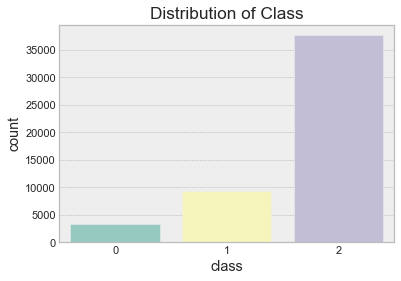

In [6]:
sns.countplot(df['class'], palette='Set3').set_title('Distribution of Class')

#plt.savefig('../visualizations/orig_class_imbalance.png', bbox_inches = "tight", pad_inches=.5)

In [7]:
df['class'].sum() / len(df['class'])

1.686297957149975

## Creating new column `label` for hate speech binary

In the original data, the `class` column identifies each tweet as 0 for hate speech, 1 for offensive language or 2 for neither. 

We will be changing offensive language to 2, and identifying that all to 0 for **not hate speech**. And changing hate specch to 1.

In [8]:
df['label'] = df['class'].replace(1, 2)

In [9]:
df.label.unique()

array([2, 0], dtype=int64)

In [10]:
# changing hate speech to 1 and not hate speech to 0
df['label'] = df['label'].replace(0, 1)
df['label'] = df['label'].replace(2, 0)

In [11]:
df.label.unique()

array([0, 1], dtype=int64)

c:\Users\Ricky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


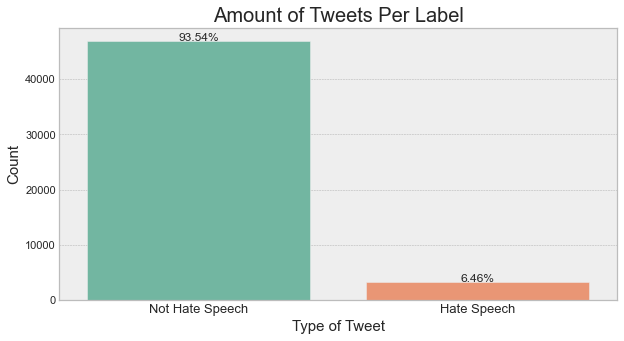

In [12]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['label'], palette='Set2')

ax.set_title('Amount of Tweets Per Label',fontsize = 20)
ax.set_xlabel('Type of Tweet',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
ax.set_xticklabels(['Not Hate Speech','Hate Speech'],fontsize = 13)

total = float(len(df)) # one person per row 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total * 100) + '%',
            ha="center") 

#plt.savefig('../visualizations/cleaned_class_imbalance.png', bbox_inches = "tight", pad_inches=.5)

In [13]:
# we can see that only 5.7% of the data is actual hate speech
df['label'].sum() / len(df['label'])

0.06461385151968112

## Creating new `clean_df` with renamed columns

Changes from original df:
- dropping the class column
- renaming `count` to `total_votes`
- renaming `hate_speech` to `hate_speech_votes`
- adding together `offensive_language` and `neither` to become `other_votes`

In [14]:
# creating new dataframe `clean_df`
raw_df = df[['count', 'hate_speech', 'offensive_language', 'neither', 'tweet', 'label']].copy()

In [15]:
# renaming those columns
raw_df.rename(columns={'count':'total_votes', 'hate_speech': 'hate_speech_votes', }, inplace=True)

In [16]:
# creating column for vote count for not hate speech tweets
raw_df['other_votes'] = raw_df['offensive_language'] + raw_df['neither']

In [17]:
# reordering the columns and dropping the old 'offensive_language' and 'neither' columns
raw_df = raw_df.reindex(columns=['total_votes', 'hate_speech_votes', 'other_votes','label', 'tweet'])

In [18]:
# checking that it all worked
raw_df.head()

,total_votes,hate_speech_votes,other_votes,label,tweet
0,3,1,3,0,kindly say bickering to kikuyus and kalenjins....
1,3,1,3,0,kindly remind them that we do not have thoroug...
2,3,1,3,0,kindly look at moses' statement. where has he ...
3,3,1,3,0,kindly like this page>>>wtf fun facts maasai a...
4,3,1,3,0,kindly kikuyus humble yourselves in 2022 and t...


In [19]:
# pickling the raw tweets for later EDA
raw_df.to_pickle(r"C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Datasets\raw_tweets_df.pkl")

## Cleaning `Codeswitched dataset` column - first round

In [20]:
# copying new `clean_df` and cleaning up the tweets
clean_df = raw_df.copy()

In [21]:
clean_df.head()

,total_votes,hate_speech_votes,other_votes,label,tweet
0,3,1,3,0,kindly say bickering to kikuyus and kalenjins....
1,3,1,3,0,kindly remind them that we do not have thoroug...
2,3,1,3,0,kindly look at moses' statement. where has he ...
3,3,1,3,0,kindly like this page>>>wtf fun facts maasai a...
4,3,1,3,0,kindly kikuyus humble yourselves in 2022 and t...


In [22]:
df.shape[0]

50175

In [23]:
df[df.columns[0]].count()

50175

In [24]:
# function to clean all data
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    # make text lowercase
    text = text.lower()
    # removing text within brackets
    text = re.sub('\[.*?\]', '', text)
    # removing text within parentheses
    text = re.sub('\(.*?\)', '', text)
    # removing numbers
    text = re.sub('\w*\d\w*', '', text)
    # if there's more than 1 whitespace, then make it just 1
    text = re.sub('\s+', ' ', text)
    # if there's a new line, then make it a whitespace
    text = re.sub('\n', ' ', text)
    # removing any quotes
    text = re.sub('\"+', '', text)
    # removing &amp;
    text = re.sub('(\&amp\;)', '', text)
    # removing any usernames
    text = re.sub('(@[^\s]+)', '', text)
    # removing any hashtags
    text = re.sub('(#[^\s]+)', '', text)
    # remove `rt` for retweet
    text = re.sub('(rt)', '', text)
    # string.punctuation is a string of all punctuation marks
    # so this gets rid of all punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # getting rid of `httptco`
    text = re.sub('(httptco)', '', text)

    return text

round1 = lambda x: clean_text_round1(x)

In [25]:
# appling data cleaning function to `tweet` column
clean_df['clean_tweets'] = clean_df['tweet'].apply(round1)

In [26]:
# checking that it worked
clean_df.head()

,total_votes,hate_speech_votes,other_votes,label,tweet,clean_tweets
0,3,1,3,0,kindly say bickering to kikuyus and kalenjins....,kindly say bickering to kikuyus and kalenjins ...
1,3,1,3,0,kindly remind them that we do not have thoroug...,kindly remind them that we do not have thoroug...
2,3,1,3,0,kindly look at moses' statement. where has he ...,kindly look at moses statement where has he sa...
3,3,1,3,0,kindly like this page>>>wtf fun facts maasai a...,kindly like this pagewtf fun facts maasai are ...
4,3,1,3,0,kindly kikuyus humble yourselves in 2022 and t...,kindly kikuyus humble yourselves in and take t...


In [27]:
# checking for missing values
clean_df.isnull().sum()

total_votes          0
hate_speech_votes    0
other_votes          0
label                0
tweet                0
clean_tweets         0
dtype: int64

## Pickling `clean_df` for later use
If there needs to be further data cleaning or preprocessing, that will be done in other notebooks

In [28]:
clean_df.to_pickle(r"C:\Users\Ricky\Desktop\4.2 FINAL SEMESTER\PROJECT II  Computer systems Project\rOOT\Preprocessing\clean_df.pkl")